In [1]:
import importlib
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
from multi_loc import covariance, assimilate

In [3]:
%matplotlib inline

In [4]:
def imshow(X, title=None, vmin=None, vmax=None, cmap=None):
    plt.figure()
    im = plt.imshow(X, vmin=vmin, vmax=vmax, cmap=cmap)
    plt.colorbar(im)
    plt.title(title)

In [8]:
dimension = 100
ens_size = 10
ens_ens_size = 10
ensemble_array = np.random.randn(dimension, ens_size, ens_ens_size)
H = np.eye(dimension)[::2]
obs_size = H.shape[0]

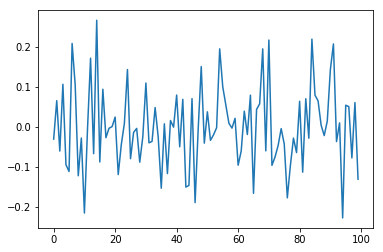

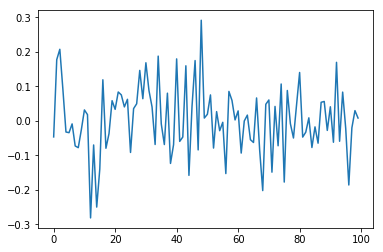

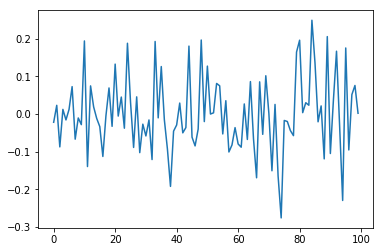

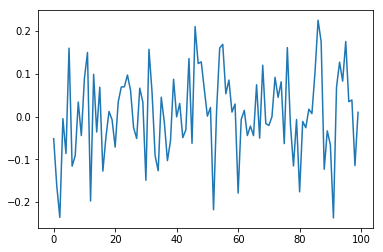

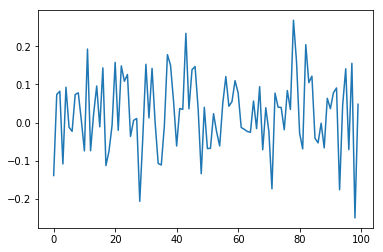

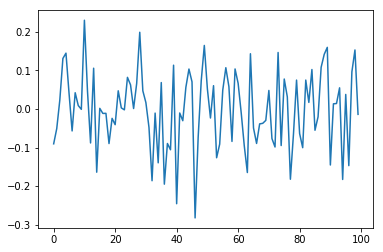

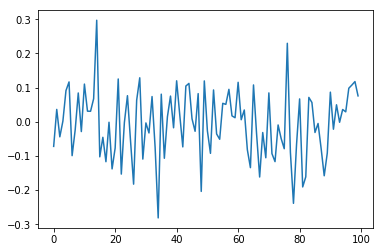

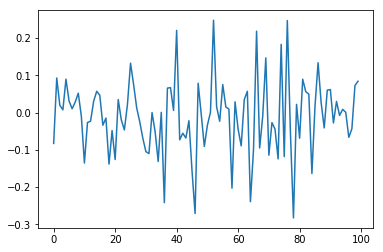

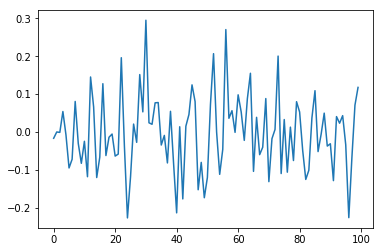

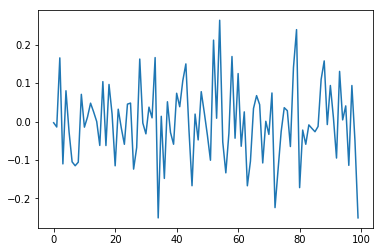

In [11]:
P_sample_array = np.ones(
    [dimension, dimension, ens_ens_size]) * np.nan
S_sample_array = np.ones(
    [obs_size, dimension, ens_ens_size]) * np.nan
VT_sample_array = np.ones(
    [dimension, dimension, ens_ens_size]) * np.nan
U_sample_array = np.ones(
    [obs_size, obs_size, ens_ens_size]) * np.nan
for ii in range(ens_ens_size):
    P_sample_array[:, :, ii] = np.cov(
        ensemble_array[:, :, ii])
    trans_mats = assimilate.transformation_matrices(
        H=H, P=P_sample_array[:, :, ii], R=np.eye(obs_size))
    aU = trans_mats['U']
    aS = trans_mats['S']
    aVT = trans_mats['VT']
    U_sample_array[:, :, ii] = aU
    S_sample_array[:, :, ii] = aS
    VT_sample_array[:, :, ii] = aVT
    
    plt.figure()
    plt.plot(aVT[0])

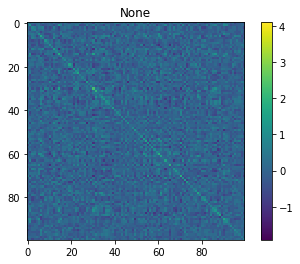

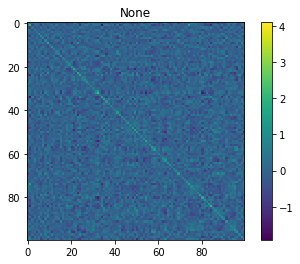

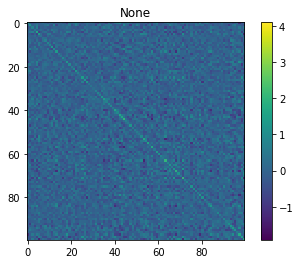

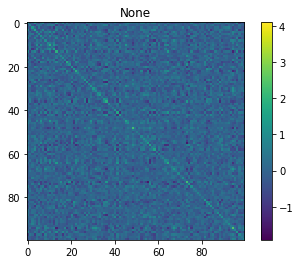

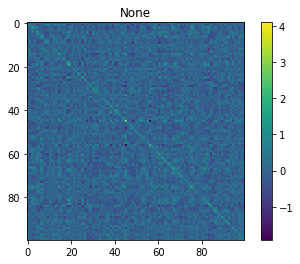

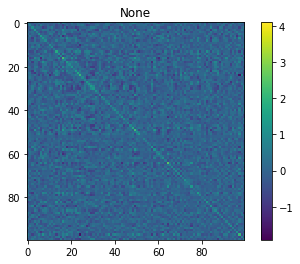

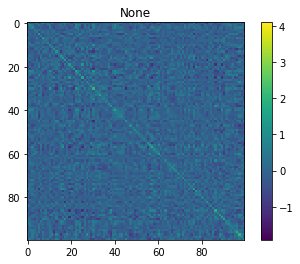

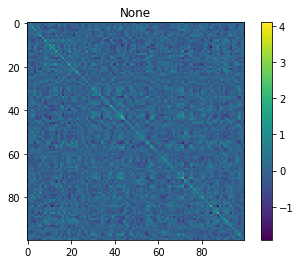

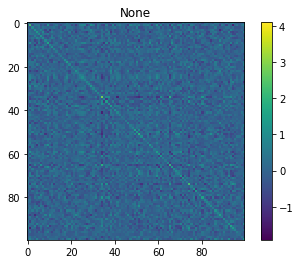

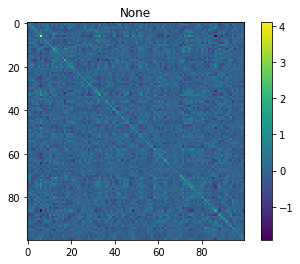

In [18]:
vmin = P_sample_array.min()
vmax = P_sample_array.max()
for ii in range(ens_ens_size):
    imshow(P_sample_array[:, :, ii], vmin=vmin, vmax=vmax)

In [ ]:
H = np.eye(dimension)
H = H[::2]

for ii in range(ens_ens_size):
    this_trans_mats = assimilate.transformation_matrices(
        H=H, P=P_sample_array[:, :, ii])
    

In [ ]:
mat = 